In [103]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import nelpy as nel
import nelpy.plotting as npl
import jagular as jag
import ghostipy as gsp
from numpy.fft import fft
import logging
import logging.config
import seaborn as sns

logging.basicConfig(level=logging.ERROR) 
warnings.simplefilter("ignore", UserWarning)

day_num = 0

# prefix = '/home/kaylavokt/Desktop/Whrath/Disruption_Day1/' ## Change this to Path Directory
# prefix = '/home/kaylavokt/Desktop/Whrath/Disruption_Day3/'
# prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day4/'
# prefix = '/home/kaylavokt/Desktop/Whrath/Control_Day5/'

pref = '/home/kaylavokt/Desktop/Whrath/'
day_path = ["Disruption_Day1/", "Disruption_Day3/", "Control_Day4/", "Control_Day5/"]
day = ["Day 1 (Disruption)", "Day 3 (Disruption)", "Day 4 (Control)", "Day 5 (Control)"]

prefix = pref + day_path[day_num]
day = day[day_num]

rec_list = ['preFamSleep', 'postTestSleep']

## Load CWT

In [104]:
path = prefix + 'inter_ripple_interval.npy'
inter_ripple_interval = np.load(path, allow_pickle=True).item()
print("load inter_ripple_interval")

path = prefix + 'ripple_center_frequency.npy'
ripple_center_frequency = np.load(path, allow_pickle=True).item()
print("load ripple_center_frequency")

path = prefix + 'ripple_peak_latency.npy'
ripple_peak_latency = np.load(path, allow_pickle=True).item()
print("load ripple_peak_latency")

path = prefix + 'avg_ripple_spectogram.npy'
avg_ripple_spectogram = np.load(path, allow_pickle=True).item()
print("load avg_ripple_spectogram")

load inter_ripple_interval
load ripple_center_frequency
load ripple_peak_latency
load avg_ripple_spectogram


## Plot Loaded Data

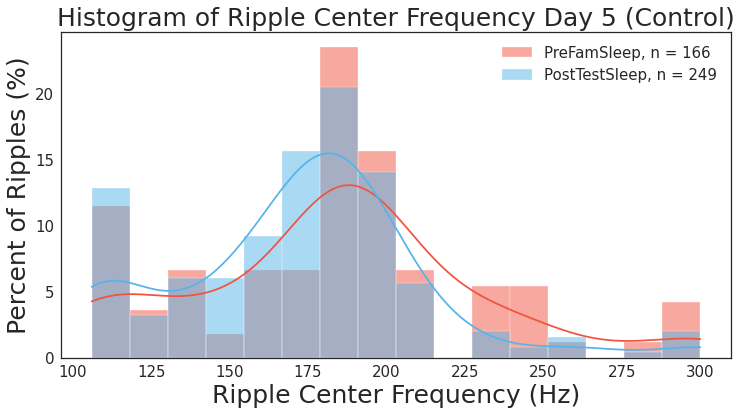

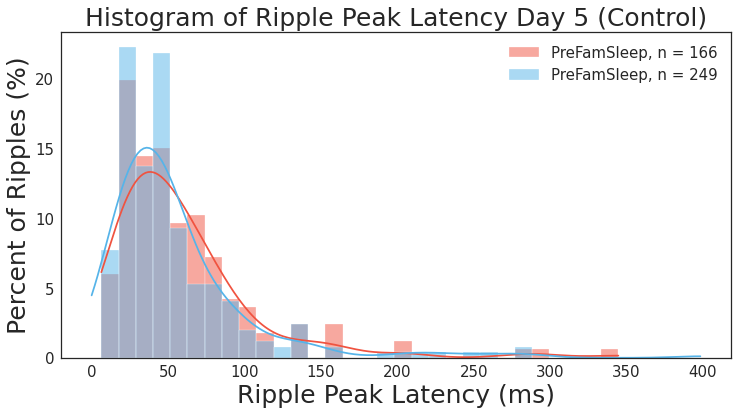

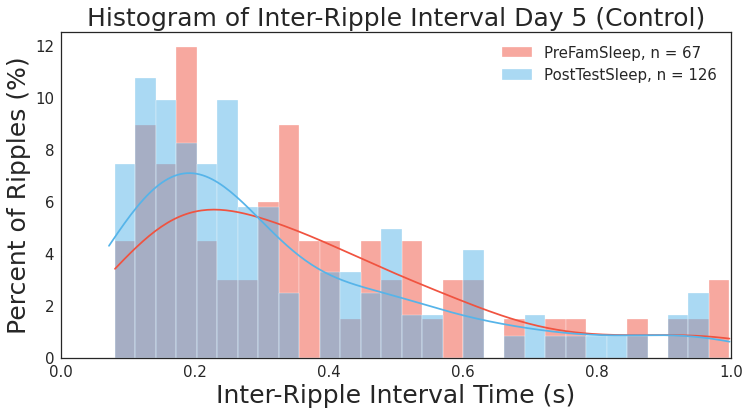

In [105]:
num_ripples = []
num_ripples.append(len(ripple_center_frequency['preFamSleep']))
num_ripples.append(len(ripple_center_frequency['postTestSleep']))
save_path = prefix = pref + day_path[day_num] + "figs/"

ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))
bins = np.histogram_bin_edges(ripple_center_frequency['preFamSleep'], bins=16)
sns.histplot(ripple_center_frequency['preFamSleep'], bins=bins, color=npl.colors.sweet.red, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep, n = "+str(num_ripples[0]))
sns.histplot(ripple_center_frequency['postTestSleep'], bins=bins, color=npl.colors.sweet.blue,  edgecolor='w', kde=True, stat = "percent", label="PostTestSleep, n = " + str(num_ripples[1]))
ax.set_title("Histogram of Ripple Center Frequency " + day)
ax.set_xlabel("Ripple Center Frequency (Hz)")
ax.set_ylabel("Percent of Ripples (%)")
plt.legend()
# plt.savefig(save_path + 'ripple_center_frequency.png')
plt.show()


ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))
bins = np.histogram_bin_edges(ripple_peak_latency['preFamSleep']*1000, bins=30)
sns.histplot(ripple_peak_latency['preFamSleep']*1000, bins=bins, color=npl.colors.sweet.red, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep, n = "+str(num_ripples[0]))
sns.histplot(ripple_peak_latency['postTestSleep']*1000, bins=bins, color=npl.colors.sweet.blue, edgecolor='w', kde=True, stat = "percent", label="PreFamSleep, n = "+str(num_ripples[1]))
ax.set_title("Histogram of Ripple Peak Latency " + day)
ax.set_xlabel("Ripple Peak Latency (ms)")
ax.set_ylabel("Percent of Ripples (%)")
plt.legend()
# plt.savefig(save_path + 'ripple_peak_latency.png')
plt.show()

ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 15, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))
limit = np.where(inter_ripple_interval['preFamSleep'] < 1)
bins = np.histogram_bin_edges(inter_ripple_interval['preFamSleep'][limit], bins=30)
sns.histplot(inter_ripple_interval['preFamSleep'][limit], bins=bins, edgecolor='w', color=npl.colors.sweet.red, kde=True, stat = "percent", label="PreFamSleep, n = "+str(len(limit[0])))
limit = np.where(inter_ripple_interval['postTestSleep'] < 1)
sns.histplot(inter_ripple_interval['postTestSleep'][limit], bins=bins, edgecolor='w', color=npl.colors.sweet.blue, kde=True, stat = "percent", label="PostTestSleep, n = "+str(len(limit[0])))
ax.set_title("Histogram of Inter-Ripple Interval " + day)
ax.set_xlabel("Inter-Ripple Interval Time (s)")
ax.set_ylabel("Percent of Ripples (%)")
ax.set_xlim(0,1)
plt.legend()
# plt.savefig(save_path + 'inter_ripple_interval.png')
plt.show()


In [89]:
len(limit[0])

122

## Plot Loaded Data (without histogram)

/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


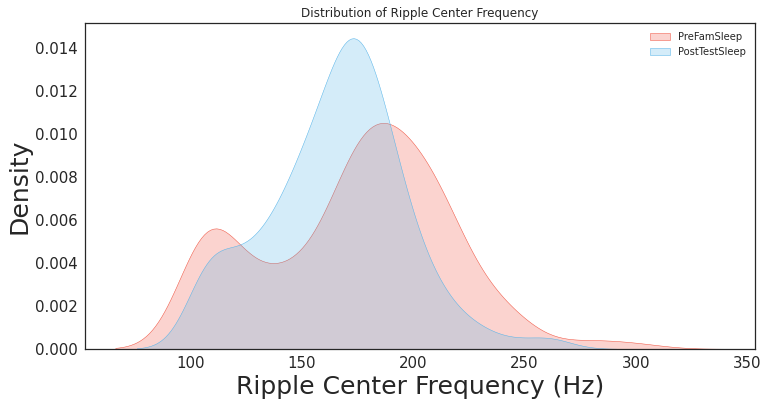

/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


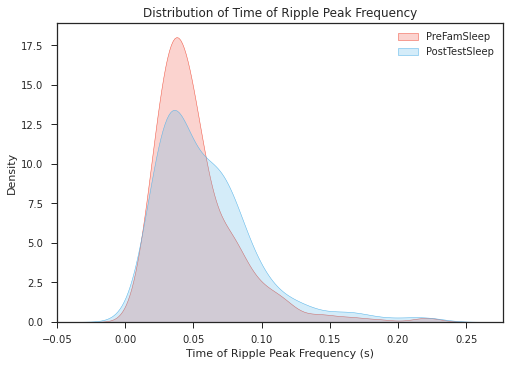

/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


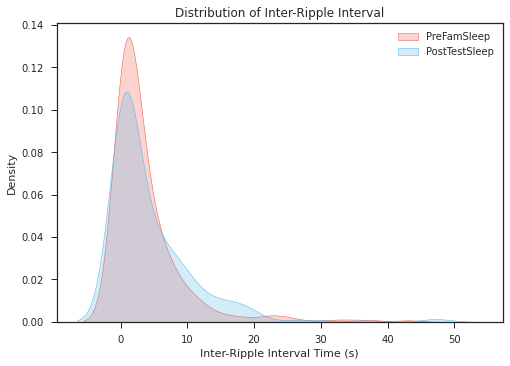

In [77]:
# Plot Ripple Center Frequency

ax = plt.gca()
npl.setup()
sns.distplot(ripple_center_frequency['preFamSleep'], color=npl.colors.sweet.red,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PreFamSleep')
sns.distplot(ripple_center_frequency['postTestSleep'], color=npl.colors.sweet.blue,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PostTestSleep')
ax.set_title("Distribution of Ripple Center Frequency")
ax.set_xlabel("Ripple Center Frequency (Hz)")
ax.set_ylabel("Density")
plt.legend()
plt.show()


# Plot ripple_peak_latency

ax = plt.gca()
npl.setup()
sns.distplot(ripple_peak_latency['preFamSleep'], color=npl.colors.sweet.red,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PreFamSleep')
sns.distplot(ripple_peak_latency['postTestSleep'], color=npl.colors.sweet.blue,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PostTestSleep')
ax.set_title("Distribution of Time of Ripple Peak Frequency")
ax.set_xlabel("Time of Ripple Peak Frequency (s)")
ax.set_ylabel("Density")
plt.legend()
plt.show()

# Plot Inter-Ripple Interval

ax = plt.gca()
npl.setup()
sns.distplot(inter_ripple_interval['preFamSleep'], color=npl.colors.sweet.red,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PreFamSleep')
sns.distplot(inter_ripple_interval['postTestSleep'], color=npl.colors.sweet.blue,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PostTestSleep')
ax.set_title("Distribution of Inter-Ripple Interval")
ax.set_xlabel("Inter-Ripple Interval Time (s)")
ax.set_ylabel("Density")
plt.legend()
plt.show()


315

In [39]:
limit = np.where(inter_ripple_interval['preFamSleep'] < 3)
inter_ripple_interval['preFamSleep'][limit]

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  38,  39,  40,
         41,  42,  43,  44,  45,  47,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  90,  91,  93,  94,  95,  96,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114,
        115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128,
        130, 131, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144,
        145, 146, 148, 150, 151, 153, 155, 160, 162, 163, 164, 165, 166,
        168, 171, 173, 176, 177, 178, 180, 181, 184, 185, 191, 193, 194,
        195, 196, 197, 198, 199, 200, 201, 203, 207, 209, 210, 211, 212,
        215, 216, 217, 219, 223, 224, 225, 226, 227

## Run CWT

In [27]:
path = prefix + 'denoised_epochs.npy'
denoised = np.load(path, allow_pickle=True).item()
# Downsample Data
denoised['preFamSleep'] = denoised['preFamSleep'].downsample(fs_out=3000)
denoised['postTestSleep'] = denoised['postTestSleep'].downsample(fs_out=3000)
print("denoised")
print(denoised)

path = prefix + 'ripple_epochs.npy'
ripple_epochs = np.load(path, allow_pickle=True).item()
print("ripple_epochs")
print(ripple_epochs)

ripple_center_times = {}
ripple_spectogram = {}
ripple_center_frequency = {} # np.array(ripple_center_fs_time)/3000
ripple_center_fs_time = {}
avg_ripple_spectogram = {} # np.mean(ripple_spectogram, axis=0)


denoised
{'preFamSleep': <AnalogSignalArray at 0x7fb083feec18: 1 signals (9 segments)> for a total of 19:51:640 minutes, 'postTestSleep': <AnalogSignalArray at 0x7fb0840a4550: 1 signals (14 segments)> for a total of 20:36:987 minutes}
ripple_epochs
{'preFamSleep': <EpochArray at 0x7fb0840a4630: 166 epochs> of length 19.2852 seconds, 'postTestSleep': <EpochArray at 0x7fb053646a90: 249 epochs> of length 28.49110000000000004 seconds}


In [28]:
for r in [0, 1]:
    session = rec_list[r]
    print("Session = ", session)
    ripple_center_times[session] = []
    ripple_spectogram[session] = []
    ripple_center_frequency[session] = []
    ripple_center_fs_time[session] = []

    # Take CWT of Full (Denoised) Signal

    signal = denoised[session].data[0]
    coefs_cwt, _, f_cwt, t_cwt, _ = gsp.cwt(signal, fs=3000,freq_limits=[100, 300])
    rev_f_cwt = f_cwt[::-1]

    print(np.shape(coefs_cwt))
    
    # Get Same Size Window for All Ripple Spectograms

    times = denoised[session].time
    num_ripples = len(ripple_epochs[session])

    for r in range(num_ripples):

        rip = np.mean(ripple_epochs[session][r].time[0])
        ripple_center_times[session].append(rip)

        rip_window = nel.EpochArray([rip, rip]).expand(0.1).time[0]
        start = np.where(times >= rip_window[0])[0][0] # 100ms before center of ripple
        stop = start + 600 # np.where(times >= rip_window[1])[0][0] # 100ms after center of ripple

        ripple_cwt = coefs_cwt[:, start:stop]
        ripple_spectogram[session].append(ripple_cwt)

    print("Found ripple_spectogram")
    print(len(ripple_spectogram[session]))
    print("Found ripple_center_times")
    print(np.size(ripple_center_times[session]))
    
    # Get Ripple Center Frequency

    for r in range(num_ripples):

        rip = ripple_epochs[session][r].time[0]

        start = np.where(times >= rip[0])[0][0] # start of ripple
        stop = np.where(times >= rip[1])[0][0] # end of ripple

        ripple_cwt = coefs_cwt[:, start:stop]
        t_ctr = np.argmax(ripple_cwt.max(axis=0)) # Time of Ripple Center Frequency
        f_ctr = np.argmax(ripple_cwt.max(axis=1)) # Ripple Center Frequency

        ripple_center_frequency[session].append(rev_f_cwt[f_ctr])
        ripple_center_fs_time[session].append(t_ctr)

    print("Found ripple_center_frequency")
    print(np.size(ripple_center_frequency[session]))

    print("Found ripple_center_fs_time")
    print(np.size(ripple_center_fs_time[session]))
    

Session =  preFamSleep
(16, 3574923)
Found ripple_spectogram
166
Found ripple_center_times
166
Found ripple_center_frequency
166
Found ripple_center_fs_time
166
Session =  postTestSleep
(16, 3710968)
Found ripple_spectogram
249
Found ripple_center_times
249
Found ripple_center_frequency
249
Found ripple_center_fs_time
249


## Save Data

In [29]:
# inter_ripple_interval
inter_ripple_interval = {}
inter_ripple_interval['preFamSleep'] = np.diff(ripple_center_times['preFamSleep'])
inter_ripple_interval['postTestSleep'] = np.diff(ripple_center_times['postTestSleep'])
path = prefix + 'inter_ripple_interval.npy'
np.save(path, inter_ripple_interval)
print("saved inter_ripple_interval")

# ripple_center_frequency
path = prefix + 'ripple_center_frequency.npy'
np.save(path, ripple_center_frequency)
print("saved ripple_center_frequency")

# ripple_peak_latency
ripple_center_fs_time['preFamSleep'] = np.array(ripple_center_fs_time['preFamSleep'] )/3000
ripple_center_fs_time['postTestSleep'] = np.array(ripple_center_fs_time['postTestSleep'])/3000
path = prefix + 'ripple_peak_latency.npy'
np.save(path, ripple_center_fs_time)
print("saved ripple_peak_latency")

# avg_ripple_spectogram
avg_ripple_spectogram['preFamSleep'] = np.mean(ripple_spectogram['preFamSleep'], axis=0)
avg_ripple_spectogram['postTestSleep'] = np.mean(ripple_spectogram['postTestSleep'], axis=0)
avg_ripple_spectogram['f_cwt'] = f_cwt
avg_ripple_spectogram['t_cwt'] = t_cwt[0:600]
path = prefix + 'avg_ripple_spectogram.npy'
np.save(path, avg_ripple_spectogram)
print("saved avg_ripple_spectogram")


saved inter_ripple_interval
saved ripple_center_frequency
saved ripple_peak_latency
saved avg_ripple_spectogram


## Plots

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

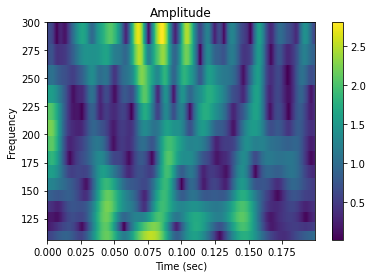

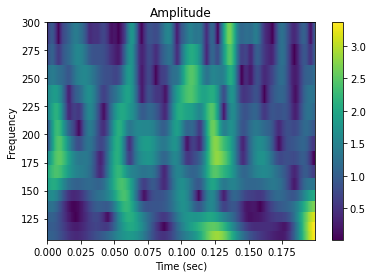

In [5]:
for r in [0, 1]:
    session = rec_list[r]
    f_cwt = avg_ripple_spectogram['f_cwt']
    t_cwt = avg_ripple_spectogram['t_cwt']
    gsp.plot_wavelet_spectrogram(avg_ripple_spectogram[session], f_cwt, t_cwt)

    t_ctr = np.argmax(avg_ripple_spectogram[session].max(axis=0)) # Time of Ripple Center Frequency
    f_ctr = np.argmax(avg_ripple_spectogram[session].max(axis=1)) # Ripple Center Frequency

# print(t_cwt[t_ctr], f_cwt[::-1][f_ctr])

# npl.plot(t_cwt[t_ctr], f_cwt[::-1][f_ctr], marker='^', color='red')

# npl.plot(.08, 200, %%markdowner='^', color='red')

/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


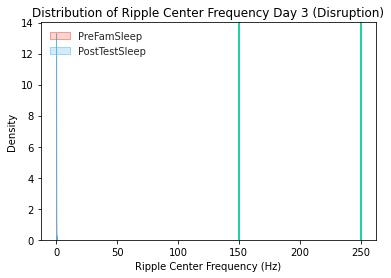

NameError: name 'ripple_center_fs_time' is not defined

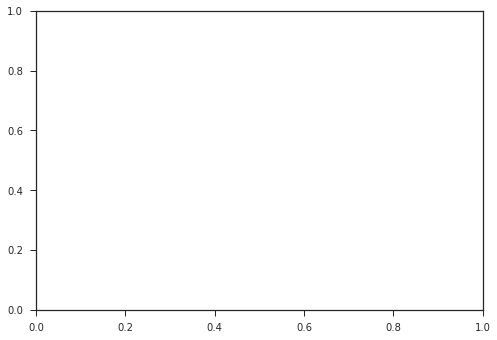

In [6]:
# Plot Ripple Center Frequency

import seaborn as sns

ax = plt.gca()
npl.setup()
# npl.set_palette(npl.colors.cows)
# npl.setup(font_scale=2, style='white',\
#          rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
#              'axes.titlesize':25, 'legend.fontsize': 20, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

sns.distplot(ripple_center_frequency['preFamSleep'], color=npl.colors.sweet.red,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PreFamSleep')
sns.distplot(ripple_center_frequency['postTestSleep'], color=npl.colors.sweet.blue,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PostTestSleep')
ax.set_title("Distribution of Ripple Center Frequency Day 3 (Disruption)")
plt.axvline(150)
plt.axvline(250)
ax.set_xlabel("Ripple Center Frequency (Hz)")
ax.set_ylabel("Density")
plt.legend()
plt.show()


# Plot Ripple Center Frequency Time

ax = plt.gca()
npl.setup()
# npl.set_palette(npl.colors.cows)
# npl.setup(font_scale=2, style='white',\
#          rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
#              'axes.titlesize':25, 'legend.fontsize': 20, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

sns.distplot(np.array(ripple_center_fs_time['preFamSleep'])/3000, color=npl.colors.sweet.red,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PreFamSleep')
sns.distplot(np.array(ripple_center_fs_time['postTestSleep'])/3000, color=npl.colors.sweet.blue,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PostTestSleep')
ax.set_title("Distribution of Time of Ripple Peak Frequency Day 3 (Disruption)")
ax.set_xlabel("Time of Ripple Peak Frequency (s)")
ax.set_ylabel("Density")
plt.legend()
plt.show()

# Plot Inter-Ripple Interval

ax = plt.gca()
npl.setup()
# npl.set_palette(npl.colors.cows)
# npl.setup(font_scale=2, style='white',\
#          rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
#              'axes.titlesize':25, 'legend.fontsize': 20, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

sns.distplot(np.diff(ripple_center_times['preFamSleep']), color=npl.colors.sweet.red,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PreFamSleep')
sns.distplot(np.diff(ripple_center_times['postTestSleep']), color=npl.colors.sweet.blue,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='PostTestSleep')
ax.set_title("Distribution of Inter-Ripple Interval Day 4 (Control)")
ax.set_xlabel("Inter-Ripple Interval Time (s)")
ax.set_ylabel("Density")
plt.legend()
plt.show()


In [ ]:
# gsp.plot_wavelet_spectrogram(coefs_cwt[:, start:stop], f_cwt,t_cwt[0:600])

# gsp.plot_wavelet_spectrogram(ripple_spectogram[120], f_cwt,t_cwt[0:600])

# np.mean(ripple_spectogram[:], axis=1)
